**Jose Miguel Acuña Hernandez**

**jacunah@unal.edu.co**

En este documento dejo explicito los resultados del anáisis de datos realizado a la base de datos *8. Respuestas Acoso Escoral.xlsx - Respuestas de formulario.csv*

#  Librerias, llamado de base de datos y filtrado de datos

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
Datos = pd.read_pickle('Datos.pkl').drop(columns=['Género', 'Grupo familiar'])

In [3]:
Datos_por_colegio = Datos.copy().groupby('Colegio').sum().reset_index()
Datos_por_colegio = Datos_por_colegio[Datos_por_colegio['Reportes de abuso físico'] != 0]

In [4]:
Datos_relativos = Datos_por_colegio.copy()
Datos_relativos['Reportes de abuso físico por estudiante'] = Datos_relativos['Reportes de abuso físico'] / Datos_relativos['Cantidad de estudiantes']
Datos_relativos['Reportes de abuso psicológico por estudiante'] = Datos_relativos['Reportes de abuso psicológico'] / Datos_relativos['Cantidad de estudiantes']
Datos_relativos['Reportes de ciberbullying por estudiante'] = Datos_relativos['Reportes de ciberbullying'] / Datos_relativos['Cantidad de estudiantes']

Datos_relativos['Porcentaje victimas de abuso físico'] = Datos_relativos['Victimas de abuso físico'] / Datos_relativos['Cantidad de estudiantes']*100
Datos_relativos['Porcentaje victimas de abuso psicológico'] = Datos_relativos['Victimas de abuso psicológico'] / Datos_relativos['Cantidad de estudiantes']*100
Datos_relativos['Porcentaje victimas de ciberbullying'] = Datos_relativos['Victimas de ciberbullying'] / Datos_relativos['Cantidad de estudiantes']*100

Datos_relativos.drop(columns=['Reportes de abuso físico', 'Reportes de abuso psicológico', 'Reportes de ciberbullying', 'Cantidad de estudiantes', 'Victimas de abuso físico', 'Victimas de abuso psicológico', 'Victimas de ciberbullying'], inplace=True)

# ENSLAP

In [5]:
ENSLAP = Datos_por_colegio.copy()[Datos_por_colegio['Colegio'] == 'ENSLAP']
print("En ENSLAP se reportan", ENSLAP['Reportes de abuso físico'].values[0], "casos de abuso físico, ", ENSLAP['Reportes de abuso psicológico'].values[0], "casos de abuso psicológico y ", ENSLAP['Reportes de ciberbullying'].values[0], "casos de ciberbullying.")

En ENSLAP se reportan 55.0 casos de abuso físico,  199.0 casos de abuso psicológico y  62 casos de ciberbullying.


In [6]:
ENSLAP_relativos = Datos_relativos.copy()[Datos_relativos['Colegio'] == 'ENSLAP']
print("En ENSLAP el ", ENSLAP_relativos['Porcentaje victimas de abuso físico'].values[0], "% de los estudiantes reportan ser víctimas de abuso físico, el ", ENSLAP_relativos['Porcentaje victimas de abuso psicológico'].values[0], "% de abuso psicológico y el ", ENSLAP_relativos['Porcentaje victimas de ciberbullying'].values[0], "% de ciberbullying.")
print("En ENSLAP se reportan ", ENSLAP_relativos['Reportes de abuso físico por estudiante'].values[0], "casos de abuso físico por estudiante, ", ENSLAP_relativos['Reportes de abuso psicológico por estudiante'].values[0], "casos de abuso psicológico por estudiante y ", ENSLAP_relativos['Reportes de ciberbullying por estudiante'].values[0], "casos de ciberbullying por estudiante.")

En ENSLAP el  40.0 % de los estudiantes reportan ser víctimas de abuso físico, el  67.14285714285714 % de abuso psicológico y el  41.42857142857143 % de ciberbullying.
En ENSLAP se reportan  0.7857142857142857 casos de abuso físico por estudiante,  2.842857142857143 casos de abuso psicológico por estudiante y  0.8857142857142857 casos de ciberbullying por estudiante.


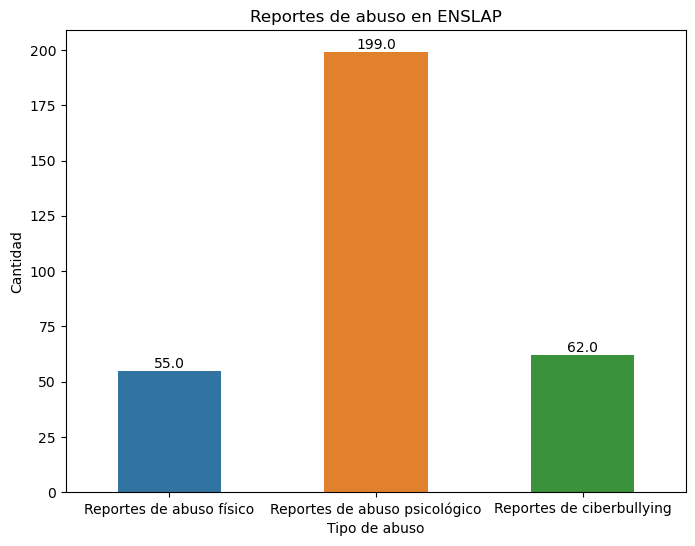

In [7]:
sumas_abusos = ENSLAP[['Reportes de abuso físico', 'Reportes de abuso psicológico', 'Reportes de ciberbullying']].sum()

plt.figure(figsize=(8,6))
sns.barplot(x=sumas_abusos.index, y=sumas_abusos.values, width=0.5)

for i, valor in enumerate(sumas_abusos.values):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

plt.title('Reportes de abuso en ENSLAP')
plt.xlabel('Tipo de abuso')
plt.ylabel('Cantidad')
plt.show()

# INEM

In [8]:
INEM = Datos_por_colegio.copy()[Datos_por_colegio['Colegio'] == 'INEM']
print("En INEM se reportan", INEM['Reportes de abuso físico'].values[0], "casos de abuso físico, ", INEM['Reportes de abuso psicológico'].values[0], "casos de abuso psicológico y ", INEM['Reportes de ciberbullying'].values[0], "casos de ciberbullying.")

En INEM se reportan 258.0 casos de abuso físico,  410.0 casos de abuso psicológico y  90 casos de ciberbullying.


In [9]:
INEM_relativos = Datos_relativos.copy()[Datos_relativos['Colegio'] == 'INEM']
print("En INEM el ", INEM_relativos['Porcentaje victimas de abuso físico'].values[0], "% de los estudiantes reportan ser víctimas de abuso físico, el ", INEM_relativos['Porcentaje victimas de abuso psicológico'].values[0], "% de abuso psicológico y el ", INEM_relativos['Porcentaje victimas de ciberbullying'].values[0], "% de ciberbullying.")
print("En INEM se reportan ", INEM_relativos['Reportes de abuso físico por estudiante'].values[0], "casos de abuso físico por estudiante, ", INEM_relativos['Reportes de abuso psicológico por estudiante'].values[0], "casos de abuso psicológico por estudiante y ", INEM_relativos['Reportes de ciberbullying por estudiante'].values[0], "casos de ciberbullying por estudiante.")

En INEM el  41.221374045801525 % de los estudiantes reportan ser víctimas de abuso físico, el  51.14503816793893 % de abuso psicológico y el  22.137404580152673 % de ciberbullying.
En INEM se reportan  1.9694656488549618 casos de abuso físico por estudiante,  3.1297709923664123 casos de abuso psicológico por estudiante y  0.6870229007633588 casos de ciberbullying por estudiante.


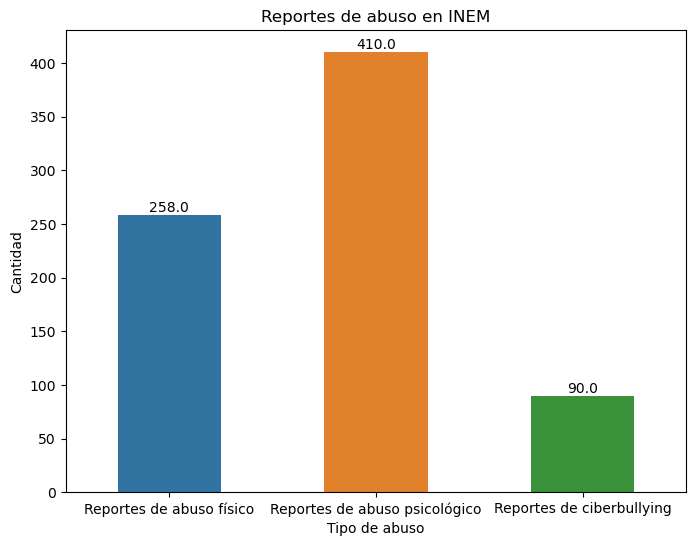

In [10]:
sumas_abusos = INEM[['Reportes de abuso físico', 'Reportes de abuso psicológico', 'Reportes de ciberbullying']].sum()

plt.figure(figsize=(8,6))
sns.barplot(x=sumas_abusos.index, y=sumas_abusos.values, width=0.5)

for i, valor in enumerate(sumas_abusos.values):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

plt.title('Reportes de abuso en INEM')
plt.xlabel('Tipo de abuso')
plt.ylabel('Cantidad')
plt.show()

# IT Gonzalo Suárez R.

In [11]:
IT = Datos_por_colegio.copy()[Datos_por_colegio['Colegio'] == 'IT Gonzalo Suárez R.']
print("En IT Gonzalo Suárez R. se reportan", IT['Reportes de abuso físico'].values[0], "casos de abuso físico, ", IT['Reportes de abuso psicológico'].values[0], "casos de abuso psicológico y ", IT['Reportes de ciberbullying'].values[0], "casos de ciberbullying.")

En IT Gonzalo Suárez R. se reportan 127.0 casos de abuso físico,  218.0 casos de abuso psicológico y  54 casos de ciberbullying.


In [12]:
IT_relativos = Datos_relativos.copy()[Datos_relativos['Colegio'] == 'IT Gonzalo Suárez R.']
print("En IT Gonzalo Suárez R. el ", IT_relativos['Porcentaje victimas de abuso físico'].values[0], "% de los estudiantes reportan ser víctimas de abuso físico, el ", IT_relativos['Porcentaje victimas de abuso psicológico'].values[0], "% de abuso psicológico y el ", IT_relativos['Porcentaje victimas de ciberbullying'].values[0], "% de ciberbullying.")
print("En IT Gonzalo Suárez R. se reportan ", IT_relativos['Reportes de abuso físico por estudiante'].values[0], "casos de abuso físico por estudiante, ", IT_relativos['Reportes de abuso psicológico por estudiante'].values[0], "casos de abuso psicológico por estudiante y ", IT_relativos['Reportes de ciberbullying por estudiante'].values[0], "casos de ciberbullying por estudiante.")

En IT Gonzalo Suárez R. el  57.692307692307686 % de los estudiantes reportan ser víctimas de abuso físico, el  73.07692307692307 % de abuso psicológico y el  28.846153846153843 % de ciberbullying.
En IT Gonzalo Suárez R. se reportan  2.4423076923076925 casos de abuso físico por estudiante,  4.1923076923076925 casos de abuso psicológico por estudiante y  1.0384615384615385 casos de ciberbullying por estudiante.


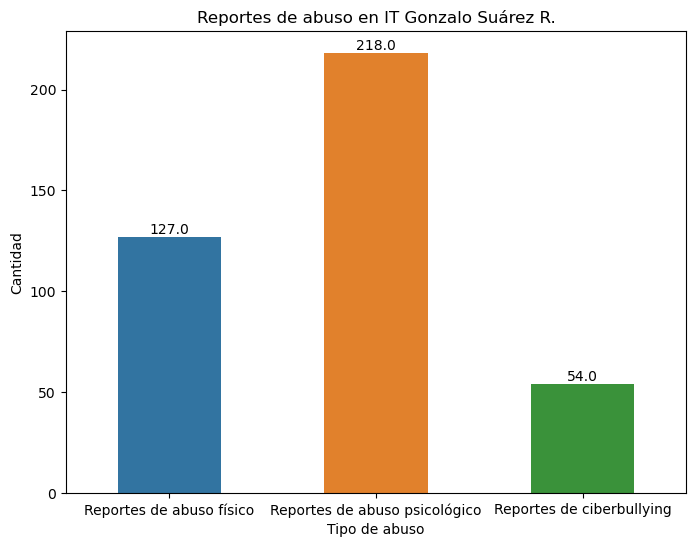

In [13]:
sumas_abusos = IT[['Reportes de abuso físico', 'Reportes de abuso psicológico', 'Reportes de ciberbullying']].sum()

plt.figure(figsize=(8,6))
sns.barplot(x=sumas_abusos.index, y=sumas_abusos.values, width=0.5)

for i, valor in enumerate(sumas_abusos.values):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

plt.title('Reportes de abuso en IT Gonzalo Suárez R.')
plt.xlabel('Tipo de abuso')
plt.ylabel('Cantidad')
plt.show()

# SILVINO RODRIGUEZ

In [14]:
SILVINO = Datos_por_colegio.copy()[Datos_por_colegio['Colegio'] == 'SILVINO RODRIGUEZ']
print("En SILVINO RODRIGUEZ se reportan", SILVINO['Reportes de abuso físico'].values[0], "casos de abuso físico, ", SILVINO['Reportes de abuso psicológico'].values[0], "casos de abuso psicológico y ", SILVINO['Reportes de ciberbullying'].values[0], "casos de ciberbullying.")

En SILVINO RODRIGUEZ se reportan 90.0 casos de abuso físico,  171.0 casos de abuso psicológico y  39 casos de ciberbullying.


In [15]:
SILVINO_relativos = Datos_relativos.copy()[Datos_relativos['Colegio'] == 'SILVINO RODRIGUEZ']
print("En SILVINO el ", SILVINO_relativos['Porcentaje victimas de abuso físico'].values[0], "% de los estudiantes reportan ser víctimas de abuso físico, el ", SILVINO_relativos['Porcentaje victimas de abuso psicológico'].values[0], "% de abuso psicológico y el ", SILVINO_relativos['Porcentaje victimas de ciberbullying'].values[0], "% de ciberbullying.")
print("En  RODRIGUEZ se reportan ", SILVINO_relativos['Reportes de abuso físico por estudiante'].values[0], "casos de abuso físico por estudiante, ", SILVINO_relativos['Reportes de abuso psicológico por estudiante'].values[0], "casos de abuso psicológico por estudiante y ", SILVINO_relativos['Reportes de ciberbullying por estudiante'].values[0], "casos de ciberbullying por estudiante.")

En SILVINO el  46.835443037974684 % de los estudiantes reportan ser víctimas de abuso físico, el  48.10126582278481 % de abuso psicológico y el  21.518987341772153 % de ciberbullying.
En  RODRIGUEZ se reportan  1.139240506329114 casos de abuso físico por estudiante,  2.1645569620253164 casos de abuso psicológico por estudiante y  0.4936708860759494 casos de ciberbullying por estudiante.


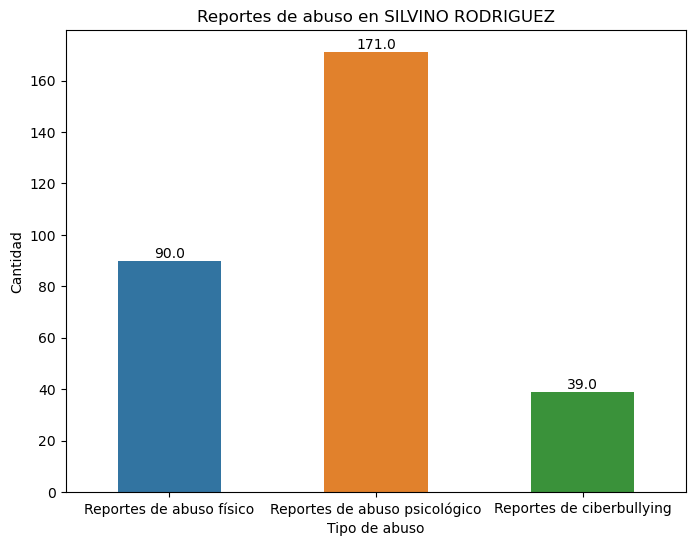

In [16]:
sumas_abusos = SILVINO[['Reportes de abuso físico', 'Reportes de abuso psicológico', 'Reportes de ciberbullying']].sum()

plt.figure(figsize=(8,6))
sns.barplot(x=sumas_abusos.index, y=sumas_abusos.values, width=0.5)

for i, valor in enumerate(sumas_abusos.values):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

plt.title('Reportes de abuso en SILVINO RODRIGUEZ')
plt.xlabel('Tipo de abuso')
plt.ylabel('Cantidad') 
plt.show()

# Contraste

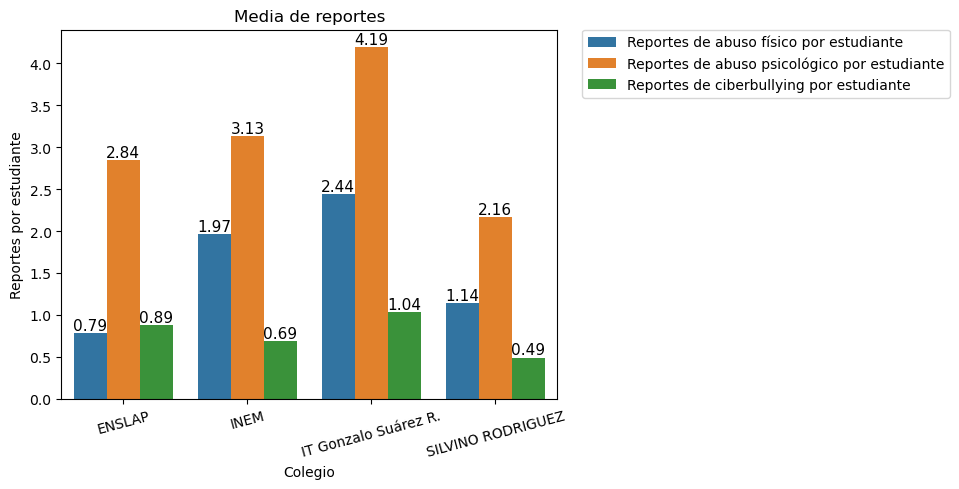

In [17]:
Datos_relativos_long = pd.melt(Datos_relativos, id_vars='Colegio', value_vars=['Reportes de abuso físico por estudiante', 'Reportes de abuso psicológico por estudiante', 'Reportes de ciberbullying por estudiante'], var_name='Tipo de abuso', value_name='Reportes por estudiante')

ax = sns.barplot(x='Colegio', y='Reportes por estudiante', hue='Tipo de abuso', data=Datos_relativos_long)
plt.xticks(rotation=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Media de reportes')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%.2f' % float(p.get_height()), 
            fontsize=11, color='black', ha='center', va='bottom')
    
plt.show()

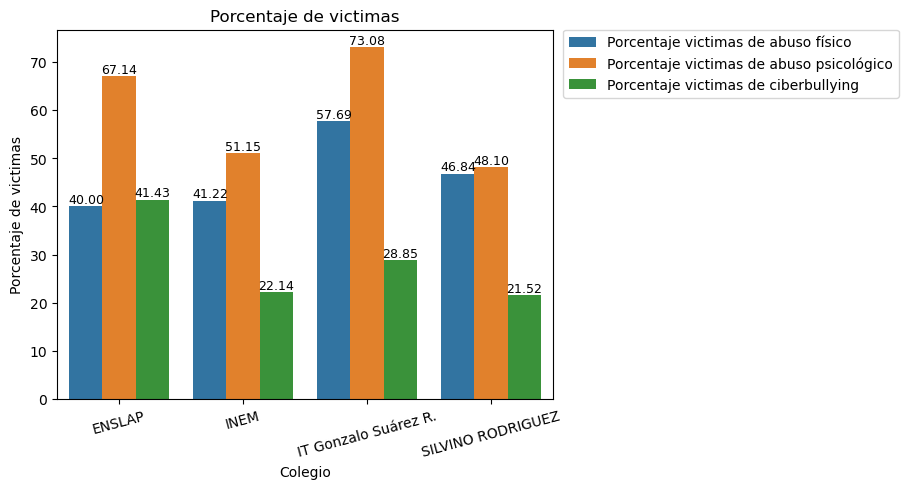

In [18]:
Datos_relativos_long = pd.melt(Datos_relativos, id_vars='Colegio', value_vars=['Porcentaje victimas de abuso físico', 'Porcentaje victimas de abuso psicológico', 'Porcentaje victimas de ciberbullying'], var_name='Tipo de abuso', value_name='Porcentaje de victimas')

ax = sns.barplot(x='Colegio', y='Porcentaje de victimas', hue='Tipo de abuso', data=Datos_relativos_long)
plt.xticks(rotation=15)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.title('Porcentaje de victimas')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%.2f' % float(p.get_height()), 
            fontsize=9, color='black', ha='center', va='bottom') 
    
plt.show()